In [7]:




#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd877013f-c8f5-4fb4-8eec-d6968b2075b3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-08-19T05:07:00.526Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9569}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [8]:
type(data)

dict

In [16]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\rasha\AppData\Local\Temp\ipykernel_19668\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946153e+07,1.946153e+07,False,NaN,1,NaN,NaN,None,2023-08-19T05:05:00.000Z,25955.401424,2.047284e+10,-37.1317,0.022458,-1.394669,-11.693731,-13.365778,-3.716868,-4.367965,5.051318e+11,48.0814,5.450634e+11,None,2023-08-19T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 05:20:54.495885
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202100e+08,1.202100e+08,True,NaN,2,NaN,NaN,None,2023-08-19T05:05:00.000Z,1660.252189,7.898299e+09,-48.5797,0.098792,-0.655274,-10.110941,-12.408553,-4.120552,-8.667236,1.995790e+11,18.9998,1.995790e+11,None,2023-08-19T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 05:20:54.495885
2,825,Tether USDt,USDT,tether,59656,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-19T05:05:00.000Z,0.999895,2.907616e+10,-40.7365,0.029837,0.001773,0.070862,-0.013258,0.013454,-0.047457,8.283775e+10,7.8850,8.667512e+10,None,2023-08-19T05:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-19 05:20:54.495885
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538520e+08,1.538520e+08,False,NaN,4,NaN,NaN,None,2023-08-19T05:05:00.000Z,215.751717,4.649112e+08,-43.6613,0.156992,0.180689,-10.136807,-10.723992,-11.169012,-30.535748,3.319384e+10,3.1600,3.319384e+10,None,2023-08-19T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 05:20:54.495885
4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-19T05:05:00.000Z,0.506268,1.734450e+09,-37.5925,0.211824,2.884135,-19.510486,-38.936396,3.229833,7.992928,2.675214e+10,2.5472,5.062678e+10,None,2023-08-19T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 05:20:54.495885
5,3408,USD Coin,USDC,usd-coin,13662,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.598674e+10,2.598674e+10,False,NaN,6,NaN,NaN,None,2023-08-19T05:05:00.000Z,1.000266,4.317773e+09,-37.0747,0.028969,0.021892,0.019076,0.036966,0.019983,0.020333,2.599365e+10,2.4742,2.599365e+10,None,2023-08-19T05:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-19 05:20:54.495885
6,2010,Cardano,ADA,cardano,892,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504799e+10,3.609196e+10,False,NaN,7,NaN,NaN,None,2023-08-19T05:05:00.000Z,0.262332,2.155728e+08,-44.6843,0.103623,1.668756,-10.516000,-19.686543,0.739145,-28.251985,9.194207e+09,0.8752,1.180494e+10,None,2023-08-19T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 05:20:54.495885
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406488e+11,1.406488e+11,True,NaN,8,NaN,NaN,None,2023-08-19T05:05:00.000Z,0.063833,4.252318e+08,-41.9004,0.167878,4.428861,-15.992521,-9.010670,2.459171,-13.483219,8.978082e+09,0.8545,8.978082e+09,None,2023-08-19T05:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 05:20:54.495885
8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdin

In [25]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 
    
    
    if not os.path.isfile(r'C:\Users\rasha\OneDrive\Desktop\Projects\Scraping\API.csv'):
        df.to_csv(r'C:\Users\rasha\OneDrive\Desktop\Projects\Scraping\API.csv', header='column_names',index=False)
    else:
        df.to_csv(r'C:\Users\rasha\OneDrive\Desktop\Projects\Scraping\API.csv', mode='a', header=False,index=False)
        

In [28]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\rasha\AppData\Local\Temp\ipykernel_19668\1546170789.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\rasha\AppData\Local\Temp\ipykernel_19668\1546170789.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946158e+07,1.946158e+07,False,NaN,1,NaN,NaN,None,2023-08-19T06:34:00.000Z,25899.786774,1.958997e+10,-41.7735,-0.093560,-2.371936,-11.816170,-14.168638,-3.410780,-4.426600,5.040508e+11,48.1022,5.438955e+11,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202100e+08,1.202100e+08,True,NaN,2,NaN,NaN,None,2023-08-19T06:34:00.000Z,1658.081273,7.535557e+09,-52.6085,0.004930,-1.977554,-10.208845,-13.093401,-4.063942,-8.684175,1.993180e+11,19.0203,1.993180e+11,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
2,825,Tether USDt,USDT,tether,59656,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.999596,2.785711e+10,-44.7034,-0.038189,-0.036350,0.024481,-0.054121,-0.014795,-0.079263,8.281305e+10,7.9030,8.664927e+10,None,2023-08-19T06:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-19 06:35:10.458878
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538520e+08,1.538520e+08,False,NaN,4,NaN,NaN,None,2023-08-19T06:34:00.000Z,215.457580,4.393771e+08,-48.1608,0.019066,-1.342835,-10.211277,-11.311188,-10.845321,-30.741986,3.314858e+10,3.1633,3.314858e+10,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.504089,1.612085e+09,-44.6211,-0.279651,-0.368707,-19.936417,-39.426738,3.627024,7.249891,2.663700e+10,2.5419,5.040888e+10,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
5,3408,USD Coin,USDC,usd-coin,13662,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.598665e+10,2.598665e+10,False,NaN,6,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.999952,4.147101e+09,-40.8222,-0.033280,-0.024334,-0.029080,-0.013890,-0.010916,-0.012557,2.598540e+10,2.4798,2.598540e+10,None,2023-08-19T06:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-19 06:35:10.458878
6,2010,Cardano,ADA,cardano,892,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504799e+10,3.609196e+10,False,NaN,7,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.261390,2.048519e+08,-49.4233,-0.037716,-0.955183,-10.763810,-20.303774,0.953312,-28.456772,9.161208e+09,0.8743,1.176257e+10,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406498e+11,1.406498e+11,True,NaN,8,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.063470,4.065998e+08,-46.2612,-0.308568,2.181392,-16.341389,-10.229408,2.186154,-14.009948,8.927086e+09,0.8519,8.927086e+09,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecos

In [30]:
df72 = pd.read_csv(r'C:\Users\rasha\OneDrive\Desktop\Projects\Scraping\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.946158e+07,19461581.0,False,NaN,1.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,2.589145e+04,1.962726e+10,-41.606500,-0.258383,-2.328653,-11.837872,-14.139652,-3.401179,-4.453664e+00,5.038885e+11,4.811840e+01,5.437204e+11,NaN,2023-08-19T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:29:58.094617
1,1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202100e+08,120210036.26594308,True,NaN,2.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,1.657901e+03,7.552534e+09,-52.455400,-0.101093,-1.864789,-10.209925,-13.052320,-4.023227,-8.683327e+00,1.992963e+11,1.902470e+01,1.992963e+11,NaN,2023-08-19T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:29:58.094617
2,2,825,Tether USDt,USDT,tether,59656,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.284648e+10,86684257831.18764,True,NaN,3.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,9.996229e-01,2.792734e+10,-44.511900,-0.008000,-0.038752,0.047513,-0.043870,-0.011508,-7.713993e-02,8.281525e+10,7.908400e+00,8.665157e+10,NaN,2023-08-19T06:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-19 06:29:58.094617
3,3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538520e+08,153852004.17718256,False,NaN,4.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,2.154059e+02,4.406693e+08,-47.965700,-0.068014,-1.161419,-10.228846,-11.316798,-10.846590,-3.076856e+01,3.314063e+10,3.163600e+00,3.314063e+10,NaN,2023-08-19T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:29:58.094617
4,4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.284187e+10,99988501123.0,False,NaN,5.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,5.041265e-01,1.618666e+09,-44.247400,-0.347570,-0.070513,-19.917105,-39.490974,3.625729,7.164821e+00,2.663899e+10,2.543700e+00,5.041265e+10,NaN,2023-08-19T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:29:58.094617
5,5,3408,USD Coin,USDC,usd-coin,13662,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.598665e+10,25986647324.40903,False,NaN,6.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,9.999709e-01,4.161994e+09,-40.480600,-0.008316,-0.016085,-0.001729,0.000822,-0.003924,-1.168564e-02,2.598589e+10,2.481500e+00,2.598589e+10,NaN,2023-08-19T06:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-19 06:29:58.094617
6,6,2010,Cardano,ADA,cardano,892,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.504799e+10,36091964625.425,False,NaN,7.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,2.613620e-01,2.053913e+08,-49.209100,-0.124565,-0.746842,-10.750350,-20.375925,0.881436,-2.845689e+01,9.160211e+09,8.747000e-01,1.176129e+10,NaN,2023-08-19T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:29:58.094617
7,7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.406498e+11,140649846383.7052,True,NaN,8.000000e+00,NaN,NaN,NaN,2023-08-19T06:28:00.000Z,6.348600e-02,4.075825e+08,-46.032100,-0.320391,2.329663

In [31]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19461581.00000,19461581.00000,False,NaN,1,NaN,NaN,None,2023-08-19T06:34:00.000Z,25899.78677,19589969033.29950,-41.77350,-0.09356,-2.37194,-11.81617,-14.16864,-3.41078,-4.42660,504050798180.07092,48.10220,543895522248.76001,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120210036.26594,120210036.26594,True,NaN,2,NaN,NaN,None,2023-08-19T06:34:00.000Z,1658.08127,7535556797.88423,-52.60850,0.00493,-1.97755,-10.20885,-13.09340,-4.06394,-8.68417,199318009908.40298,19.02030,199318009908.39999,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
2,825,Tether USDt,USDT,tether,59656,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82846484080.77919,86684257831.18764,True,NaN,3,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.99960,27857111447.90763,-44.70340,-0.03819,-0.03635,0.02448,-0.05412,-0.01479,-0.07926,82813047946.02271,7.90300,86649272803.66000,None,2023-08-19T06:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-19 06:35:10.458878
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153852004.17718,153852004.17718,False,NaN,4,NaN,NaN,None,2023-08-19T06:34:00.000Z,215.45758,439377139.59415,-48.16080,0.01907,-1.34283,-10.21128,-11.31119,-10.84532,-30.74199,33148580478.19217,3.16330,33148580478.19000,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
4,52,XRP,XRP,xrp,1034,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52841868447.00000,99988501123.00000,False,NaN,5,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.50409,1612084871.50154,-44.62110,-0.27965,-0.36871,-19.93642,-39.42674,3.62702,7.24989,26636995299.75138,2.54190,50408882355.23000,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
5,3408,USD Coin,USDC,usd-coin,13662,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25986647324.40903,25986647324.40903,False,NaN,6,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.99995,4147101173.11414,-40.82220,-0.03328,-0.02433,-0.02908,-0.01389,-0.01092,-0.01256,25985403431.38863,2.47980,25985403431.39000,None,2023-08-19T06:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-19 06:35:10.458878
6,2010,Cardano,ADA,cardano,892,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35047985492.09000,36091964625.42500,False,NaN,7,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.26139,204851871.32697,-49.42330,-0.03772,-0.95518,-10.76381,-20.30377,0.95331,-28.45677,9161208431.14941,0.87430,11762569905.62000,None,2023-08-19T06:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-19 06:35:10.458878
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140649846383.70520,140649846383.70520,True,NaN,8,NaN,NaN,None,2023-08-19T06:34:00.000Z,0.06347,406599760.43742,-46.26120,-0.30857,2.18139,-16.34139,-10.22941,2.18615,-14.00995,8927086119.39629,0.85190,8927086119.4000

In [33]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.09356,-2.37194,-11.81617,-14.16864,-3.41078,-4.42660
Ethereum,0.00493,-1.97755,-10.20885,-13.09340,-4.06394,-8.68417
Tether USDt,-0.03819,-0.03635,0.02448,-0.05412,-0.01479,-0.07926
BNB,0.01907,-1.34283,-10.21128,-11.31119,-10.84532,-30.74199
XRP,-0.27965,-0.36871,-19.93642,-39.42674,3.62702,7.24989
USD Coin,-0.03328,-0.02433,-0.02908,-0.01389,-0.01092,-0.01256
Cardano,-0.03772,-0.95518,-10.76381,-20.30377,0.95331,-28.45677
Dogecoin,-0.30857,2.18139,-16.34139,-10.22941,2.18615,-14.00995
Solana,0.28832,-2.26790,-11.59830,-19.58973,35.09856,6.69040


In [34]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.09356
             quote.USD.percent_change_24h    -2.37194
             quote.USD.percent_change_7d    -11.81617
             quote.USD.percent_change_30d   -14.16864
             quote.USD.percent_change_60d    -3.41078
             quote.USD.percent_change_90d    -4.42660
Ethereum     quote.USD.percent_change_1h      0.00493
             quote.USD.percent_change_24h    -1.97755
             quote.USD.percent_change_7d    -10.20885
             quote.USD.percent_change_30d   -13.09340
             quote.USD.percent_change_60d    -4.06394
             quote.USD.percent_change_90d    -8.68417
Tether USDt  quote.USD.percent_change_1h     -0.03819
             quote.USD.percent_change_24h    -0.03635
             quote.USD.percent_change_7d      0.02448
             quote.USD.percent_change_30d    -0.05412
             quote.USD.percent_change_60d    -0.01479
             quote.USD.percent_change_90

In [35]:
type(df4)

pandas.core.series.Series

In [36]:
df5 = df4.to_frame(name='values')
df5


values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.09356
            quote.USD.percent_change_24h  -2.37194
            quote.USD.percent_change_7d  -11.81617
            quote.USD.percent_change_30d -14.16864
            quote.USD.percent_change_60d  -3.41078
            quote.USD.percent_change_90d  -4.42660
Ethereum    quote.USD.percent_change_1h    0.00493
            quote.USD.percent_change_24h  -1.97755
            quote.USD.percent_change_7d  -10.20885
            quote.USD.percent_change_30d -13.09340
            quote.USD.percent_change_60d  -4.06394
            quote.USD.percent_change_90d  -8.68417
Tether USDt quote.USD.percent_change_1h   -0.03819
            quote.USD.percent_change_24h  -0.03635
            quote.USD.percent_change_7d    0.02448
            quote.USD.percent_change_30d  -0.05412
            quote.USD.percent_change_60d  -0.01479
            quote.USD.percent_change_90d  -0.07926
BNB         quote.USD.percent_change_1h    0.01907
            quote.USD.percent_change_24h  -1.34283
            quote.USD.percent_change_7d  -10.21128
            quote.USD.percent_change_30d -11.31119
            quote.USD.percent_change_60d -10.84532
            quote.USD.percent_change_90d -30.74199
XRP         quote.USD.percent_change_1h   -0.27965
            quote.USD.percent_change_24h  -0.36871
            quote.USD.percent_change_7d  -19.93642
            quote.USD.percent_change_30d -39.42674
            quote.USD.percent_change_60d   3.62702
            quote.USD.percent_change_90d   7.24989
USD Coin    quote.USD.percent_change_1h   -0.03328
            quote.USD.percent_change_24h  -0.02433
            quote.USD.percent_change_7d   -0.02908
            quote.USD.percent_change_30d  -0.01389
            quote.USD.percent_change_60d  -0.01092
            quote.USD.percent_change_90d  -0.01256
Cardano     quote.USD.percent_change_1h   -0.03772
            quote.USD.percent_change_24h  -0.95518
            quote.USD.percent_change_7d  -10.76381
            quote.USD.percent_change_30d -20.30377
            quote.USD.percent_change_60d   0.95331
            quote.USD.percent_change_90d -28.45677
Dogecoin    quote.USD.percent_change_1h   -0.30857
            quote.USD.percent_change_24h   2.18139
            quote.USD.percent_change_7d  -16.34139
            quote.USD.percent_change_30d -10.22941
            quote.USD.percent_change_60d   2.18615
            quote.USD.percent_change_90d -14.00995
Solana      quote.USD.percent_change_1h    0.28832
            quote.USD.percent_change_24h  -2.26790
            quote.USD.percent_change_7d  -11.59830
            quote.USD.percent_change_30d -19.58973
            quote.USD.percent_change_60d  35.09856
            quote.USD.percent_change_90d   6.69040
TRON        quote.USD.percent_change_1h   -0.13931
            quote.USD.percent_change_24h   0.97231
            quote.USD.percent_change_7d   -5.30765
            quote.USD.percent_change_30d  -9.44294
            quote.USD.percent_change_60d   5.79014
            quote.USD.percent_change_90d   1.32047
Polkadot    quote.USD.percent_change_1h   -0.15445
            quote.USD.percent_change_24h   0.13781
            quote.USD.percent_change_7d  -10.46032
            quote.USD.percent_change_30d -15.31685
            quote.USD.percent_change_60d  -0.17673
            quote.USD.percent_change_90d -16.98750
Polygon     quote.USD.percent_change_1h    0.01130
            quote.USD.percent_change_24h  -0.66745
            quote.USD.percent_change_7d  -14.79221
            quote.USD.percent_change_30d -24.69495
            quote.USD.percent_change_60d  -5.12038
            quote.USD.percent_change_90d -34.06618
Dai         quote.USD.percent_change_1h   -0.02168
            quote.USD.percent_change_24h  -0.08466
            quote.USD.percent_change_7d   -0.03770
            quote.USD.percent_change_30d  -0.07811
            quote.USD.percent_change_60d  -0.00804
            quo

In [38]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09356
1,Bitcoin,quote.USD.percent_change_24h,-2.37194
2,Bitcoin,quote.USD.percent_change_7d,-11.81617
3,Bitcoin,quote.USD.percent_change_30d,-14.16864
4,Bitcoin,quote.USD.percent_change_60d,-3.41078
5,Bitcoin,quote.USD.percent_change_90d,-4.42660
6,Ethereum,quote.USD.percent_change_1h,0.00493
7,Ethereum,quote.USD.percent_change_24h,-1.97755
8,Ethereum,quote.USD.percent_change_7d,-10.20885
9,Ethereum,quote.USD.percent_change_30d,-13.09340


In [39]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09356
1,Bitcoin,quote.USD.percent_change_24h,-2.37194
2,Bitcoin,quote.USD.percent_change_7d,-11.81617
3,Bitcoin,quote.USD.percent_change_30d,-14.16864
4,Bitcoin,quote.USD.percent_change_60d,-3.41078
5,Bitcoin,quote.USD.percent_change_90d,-4.42660
6,Ethereum,quote.USD.percent_change_1h,0.00493
7,Ethereum,quote.USD.percent_change_24h,-1.97755
8,Ethereum,quote.USD.percent_change_7d,-10.20885
9,Ethereum,quote.USD.percent_change_30d,-13.09340


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])

In [46]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.09356
1,Bitcoin,24h,-2.37194
2,Bitcoin,7d,-11.81617
3,Bitcoin,30d,-14.16864
4,Bitcoin,60d,-3.41078
5,Bitcoin,90d,-4.42660
6,Ethereum,1h,0.00493
7,Ethereum,24h,-1.97755
8,Ethereum,7d,-10.20885
9,Ethereum,30d,-13.09340


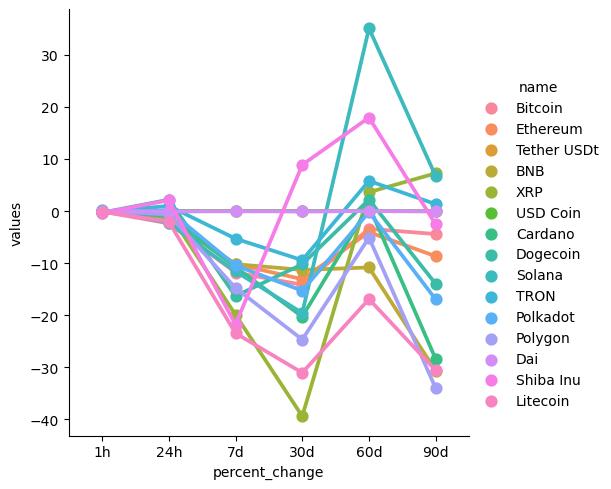

In [47]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [58]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,25899.78677,2023-08-19 06:35:10.458878


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

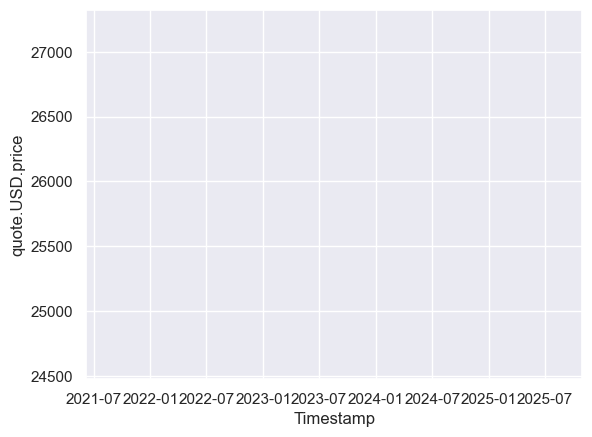

In [60]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)